# Introduction to probabilistic methods and Monte Carlo simulations
Probabilistic methods and Monte Carlo simulations represent fundamental techniques in computational mathematics, offering powerful approaches to solve complex problems that would be analytically intractable. These methods have found widespread applications across diverse domains including statistical physics, financial mathematics, quantum mechanics, machine learning, and computational biology. The course of INFO-F305 - _Modélisation et Simulation_ proposes a good introduction to Monte Carlo simulations.
    
This chapter introduces the fundamental concepts, tools, and techniques of probabilistic methods with a particular focus on Monte Carlo simulations. We will explore how to generate random variables from different distributions, estimate integrals, solve optimization problems, and analyze statistical properties of random processes. Throughout the chapter, we will emphasize both the theoretical foundations and practical implementations using Python and its scientific computing ecosystem.
    
Note, the proper understanding of this set of methods is extremely important for having a good approach of many modern Machine Learning problems. Real-life data collection can indeed, in many cases, be modelized by a Monte Carlo simulation, and the statistical/probabilistic study of the simulated problem often offers valuable insights about the real-life dynamics. 
    
By the end of this chapter, you will have developed a solid understanding of how to apply Monte Carlo techniques to solve a variety of mathematical and statistical problems, setting the foundation for more advanced applications in subsequent chapters.

## Necessary libraries

To run this practical work, the following libraries must be installed:
- `NumPy`: Vector and matrix manipulation, random number generation,
- `SciPy`: For advanced numerical statistical methods,
- `Pandas`: For advanced data manipulation
- `Matplotlib`, `seaborn`: For data visualization,
- `tqdm`: For beautiful loading bars.

```{margin}
If the libraries are already installed, you can skip this step.
```

If you are using Jupyter Notebook, you can install the dependencies directly by running the cell below:

In [1]:
#!pip install numpy matplotlib tqdm pandas seaborn  numpyarray_to_latex

```{margin}
This `pprint` function will allow to render the output of some codes in LaTeX, such as the vectors and the matrices. Remark that calling this function only works in `Jupyter`. If you code in plain `Python`, you should rather use the default `str` and `print` functions.
```

We make some imports and define a `pprint` function.

In [2]:
import numpy as np
from IPython.display import display, Math
from numpyarray_to_latex.jupyter import to_ltx
def pprint(*args):
    res = ""
    for i in args:
        if type(i) == np.ndarray:
            res += to_ltx(i, brackets='[]')
        elif type(i) == str:
            res += i
    display(Math(res))

## Introduction to `NumPy`
`NumPy` is an essential library for scientific computations in Python. It offers:
- `ndarray` objects to represent multi-dimensional arrays.
- A collection of mathematical functions to perform fast operations on these arrays.

### Manipulation of `NumPy` arrays
Here are some examples for creating and manipulating `NumPy` arrays:

## Example of creation of arrays

In [3]:
v0 = np.array([1, 2, 3])
v1 = np.arange(0, 3, 0.4)
v2 = np.linspace(0, 5, 10)
v3 = np.linspace(0, 2, 10)
M = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
pprint("v_0=", v0)
pprint("v_1=", v1)
pprint("v_2=", v2)
pprint("v_3=", v3)
pprint("M=", M)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Basic operations

```{margin}
Remark, those functions (and basically, most of the `NumPy` functions) are _vectorial_. This means that they are applied in parallel on all the components of the vectors. Later on, when we will present the `PyTorch` library, we will show how this parallelisation can benefit from using specialized hardware, such as the GPU's.
```

In [4]:
s = np.sum(v0)
m = np.mean(M)
p = np.dot(v2, v3)
print("Sum of v0 components:", s)
print("Average value in M:", m)
print("Scalar product of v2 and v3:", p)

Sum of v0 components: 6
Average value in M: 5.0
Scalar product of v2 and v3: 35.18518518518518


We encourage you to consult the official [`NumPy` documentation](https://numpy.org/doc/stable/) to explore its many features.
A larger introduction to `NumPy` and `MatPlotLib` is available in the $5^{\text{th}}$ practical of the course INFO-F305 - _Modélisation et Simulation_.

## Probabilistic Foundations
The course of MATH-F315 - _Probabilités et Statistiques_ has presented all the necessary materials used in this chapter. This is let as reference for the formal demonstrations of the tools and theorems used here. However, we propose a small review of the most important notions that will help you understand the exercises at the end of the chapter. Remember: the exercises are not meant to make you familiar with one specific practical implementation of the techniques and tools, they are intended to make you apply some well understood and completely digested statistical and probabilistic concepts. We strongly recommend the reader to delve in depth in the theoretical concepts related to the exercises.

### Expectation and Variance
The expectation of a random variable $\mathbf X$, denoted $E[\mathbf X]$, is defined as:

$$
E[\mathbf X] = \begin{cases}
    \int_{-\infty}^{\infty} x f_{\mathbf X}(x) dx & \text{for continuous $\mathbf X$} \\
    \sum_{x} x p_{\mathbf X}(x) & \text{for discrete $\mathbf X$}
\end{cases}
$$

Statistically, the average is an unbiased estimator of the expected value. In \codeword{NumPy}, the average value in an array can be computed with the `numpy.mean` function.
The variance of $\mathbf X$, denoted $\text{Var}(\mathbf X)$, measures the dispersion around the mean:

$$
\text{Var}(\mathbf X) = E[(\mathbf X - E[\mathbf X])^2] = E[\mathbf X^2] - (E[\mathbf X])^2
$$

The variance is the square of the standard deviation.
So, in `NumPy`, the variance of an array can be computed by squaring the result of the `numpy.std` function.
For two random variables $\mathbf X$ and \mathbf $Y$, their covariance is defined as:

$$
\text{Cov}(\mathbf X, \mathbf Y) = E[(\mathbf X - E[\mathbf X])(\mathbf Y - E[\mathbf Y])] = E[\mathbf X\mathbf Y] - E[\mathbf X]E[\mathbf Y]
$$

In `NumPy`, the covariance between two vectors can be computed with the `numpy.cov` function.
The correlation coefficient, which measures the linear dependence between $\mathbf X$ and $\mathbf Y$, is:

$$
\rho_{\mathbf X,\mathbf Y} = \frac{\text{Cov}(\mathbf X, \mathbf Y)}{\sqrt{\text{Var}(\mathbf X) \cdot \text{Var}(\mathbf Y)}}
$$

In `NumPy`, the correlation coefficient between two vectors can be computed with the `numpy.corrcoef function.
        
### Common Probability Distributions
#### Uniform Distribution
A random variable $\mathbf X$ follows a uniform distribution on the interval $[a, b]$, denoted $\mathbf X \sim \mathcal{U}(a, b)$, if its PDF is:

$$
    f_{\mathbf X}(x) = \begin{cases}
    \frac{1}{b - a} & \text{if } x \in [a, b] \\
    0 & \text{otherwise}
    \end{cases}
$$

The mean and variance are $E[\mathbf X] = \frac{a + b}{2}$ and $\text{Var}\mathbf (X) = \frac{(b - a)^2}{12}$, respectively.
In `NumPy`, the uniform distribution can be sampled with the `numpy.random.uniform` function.

#### Normal (Gaussian) Distribution
A random variable $\mathbf X$ follows a normal distribution with parameters $\mu$ and $\sigma^2$, denoted $X \sim \mathcal{N}(\mu, \sigma^2)$, if its PDF is:

$$
    f_{\mathbf X}(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

where $\mu$ is the mean and $\sigma^2$ is the variance.
In `NumPy`, the uniform distribution can be sampled with the `numpy.random.normal` function.

## Introduction to the `numpy.random` module
The `NumPy` library includes a `numpy.random` submodule dedicated to random number generation. This module offers:
- Random number generators for various distributions (uniform, normal, binomial, etc.).
- Tools for drawing samples and manipulating random sequences.

### Reproducibility of results
To ensure the reproducibility of simulations, it is crucial to set a random seed.

Example:

In [5]:
np.random.seed(42)
x = np.random.rand(5)
pprint("x=", x)

<IPython.core.display.Math object>

### Available distributions
Here are some common distributions:
- `numpy.random.uniform(low, high, size)` : Uniform distribution.
- `numpy.random.normal(loc, scale, size)` : Normal (Gaussian) distribution.
- `numpy.random.binomial(n, p, size)` : Binomial distribution.

### Sampling
Sampling is the process of randomly selecting elements from a population. For example:

In [6]:
population = np.array([1, 2, 3, 4, 5])
s = np.random.choice(population, size=(3, 3), replace=True)
pprint("s=", s)

<IPython.core.display.Math object>

### Statistical analysis
`Scipy` offers tools to analyse statistical distributions. As an example, if wan to get density, repartition function and quantiles of a normal distribution $\mathcal{N}(0, 1)$:

In [7]:
import scipy as sp

The probability density function of a normal distribution is given by 

$$f(x) = \frac{(\frac{e^{\frac{-(x-\mu)^2}{2}}}{\sqrt{2\pi}})}{\sigma}$$

for $\mu$ and $\sigma$ the mean and the standard deviation of the distribution.

In [8]:
mu, sigma = 0, 1
print(sp.stats.norm.pdf(1, loc=mu, scale=sigma))

0.24197072451914337


The quantiles can be obtained using the `ppf` function:

In [9]:
print(sp.stats.norm.ppf(0.75, loc=mu, scale=sigma))

0.6744897501960817


Finally, the cumulative distribution function can be obtained with `cdf`:

In [10]:
print(sp.stats.norm.cdf(0.5, loc=mu, scale=sigma))

0.6914624612740131


### Exercise: Histogram
Using the previous `pdf` function, plot the histogram of a sampled normal $\mathcal{N}(0, 1)$ and check that it behaves as the analytical probability density function. Show on the same graph the three quarter quantiles (0.25, 0.5, 0.75).

#### Solution
 In the following code, we sample a normal $\mathbf{N}(0, 1)$, and, using `Matplotlib`, we display the histogram of the sampled values, along the probability density function provided by `Scipy`. We also display the three first quarters using the `scipy.stats.norm.ppf` function.

In [11]:
import matplotlib.pyplot as plt
plt.style.use(['seaborn-v0_8-muted', 'practicals.mplstyle'])
pprint("s=", sp.stats.norm.ppf(np.array([0.25, 0.5, 0.75]), loc=mu, scale=sigma))

<IPython.core.display.Math object>

```{margin}
Try changing the number of bins. What happens if it is too low ?
```

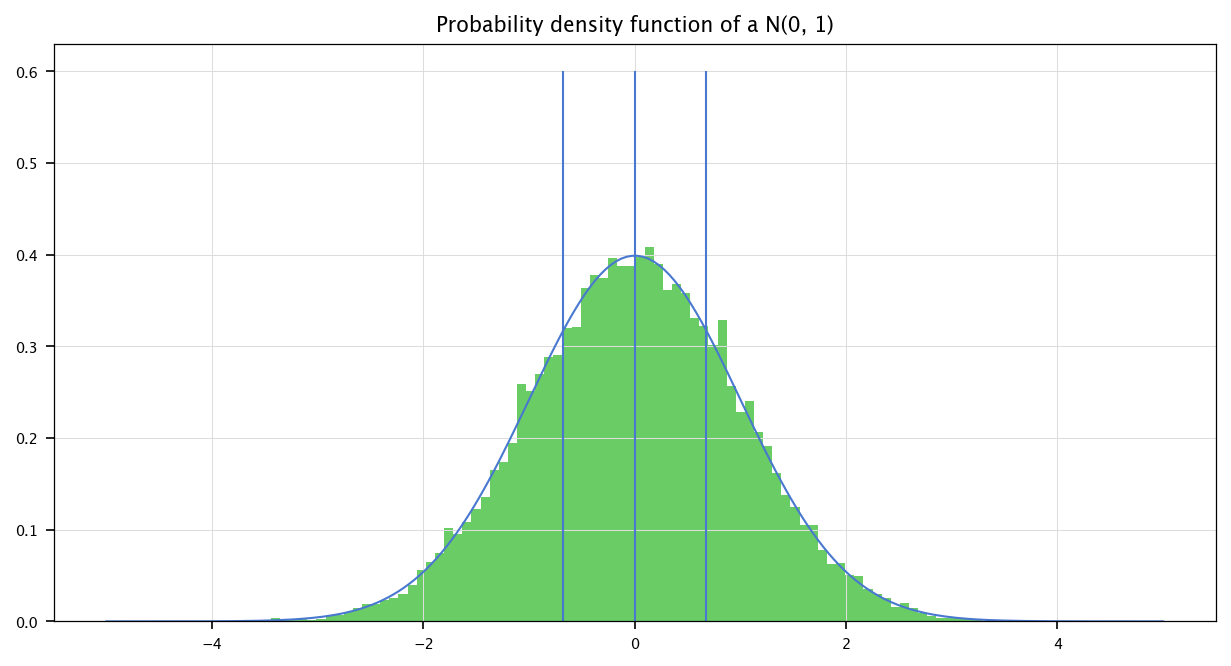

In [12]:
n_bins = 100
x = np.linspace(-5, 5, 200)
plt.figure(figsize=(10, 5))
plt.plot(x, sp.stats.norm.pdf(x, loc=mu, scale=sigma))
plt.hist(np.random.normal(size=(25000,)), bins=n_bins, density=True)
for q in sp.stats.norm.ppf(np.array([0.25, 0.5, 0.75]), loc=mu, scale=sigma):
    plt.vlines(q, 0, 0.6)
plt.grid("on")
plt.title("Probability density function of a N(0, 1)")
plt.show()

## Monte Carlo Simulation
The core principle of Monte Carlo methods lies in using random sampling to approximate numerical results. Rather than attempting to solve problems through analytical formulas, Monte Carlo techniques leverage the law of large numbers to estimate solutions through repeated random sampling. This approach is particularly valuable when dealing with high-dimensional spaces, complex geometries, or systems with multiple degrees of freedom. The simplest visual example, to understand the notion of Monte Carlo, is the following. You want to measure the surface of a lake. Its shape is complex, difficult to measure and to compute the area it covers. However, you can easily surround it by a square for which the side can accurately be measured. You then decide to randomly throw stones with a catapult on the square. The proportion of number of stones that fall into the lake compared to the total number of thrown stones (if the number of stones is infinite) is the same proportion as the proportion of the surface of the lake compared to the square surface. The more stone you throw, the more accurate the estimation is. This idea is close to the one used for Monte Carlo integration.
    
### Monte Carlo Integration
Consider the problem of evaluating the integral:

$$
    I = \int_{\Omega} f(\mathbf{x}) d\mathbf{x}
$$

The Monte Carlo estimate of this integral is:

$$
    \hat{I}_n = \frac{|\Omega|}{n} \sum_{i=1}^{n} f(\mathbf{X}_i)
$$

where $\mathbf{X}_1, \mathbf{X}_2, \dots, \mathbf{X}_n$ are i.i.d. random variables uniformly distributed over $\Omega$, and $|\Omega|$ is the measure (volume) of $\Omega$.
For a definite integral over $[a, b]$, the Monte Carlo estimate is:

$$
    \int_{a}^{b} f(x) dx \approx (b - a) \cdot \frac{1}{n} \sum_{i=1}^{n} f(X_i)
$$

where $X_i \sim \mathcal{U}(a, b)$.

### Exercise: Integral estimation
Implement a Monte Carlo simulation to estimate the integral of the function $f(x) = x^2$ over the interval $[0, 1]$.

#### Solution
The indefinite integral is given by

$$\int x^2 \,dx = \frac{x^3}{3}$$

and therefore the definite interval is

$$\int_{0}^{1} x^2 \,dx = \frac{1^3}{3} - \frac{0^3}{3} = \frac13$$

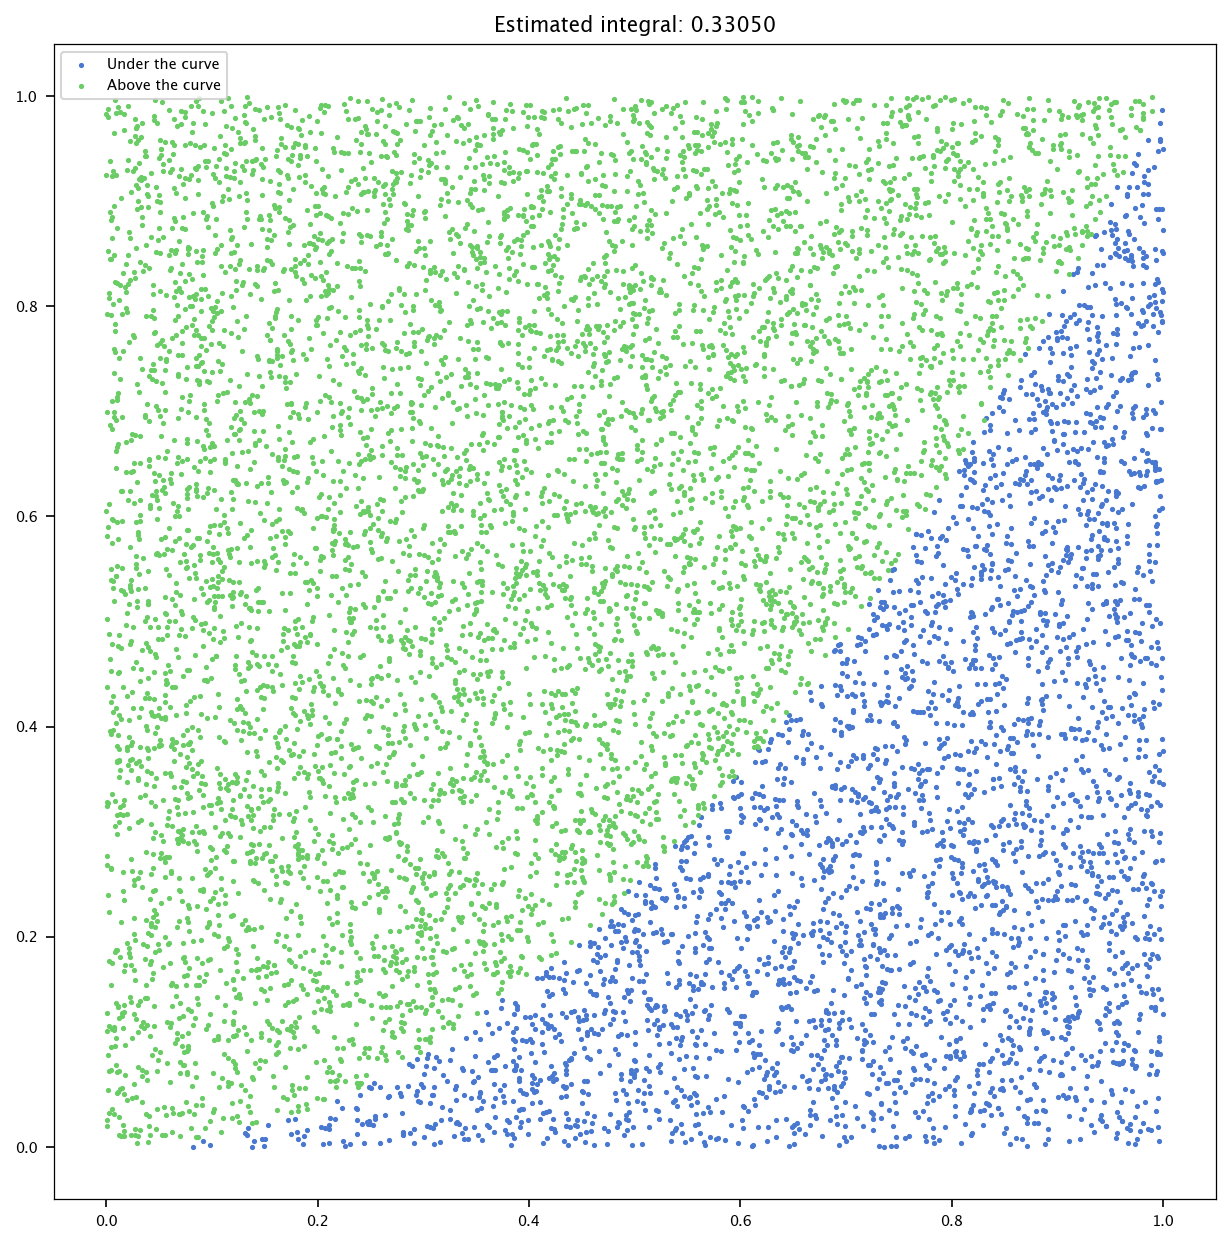

In [13]:
n_points = 10000
approximations = []
points = np.random.rand(n_points, 2)
under_curve = np.array(points[:, 1]) <= np.array(points[:, 0])**2
estimation = np.sum(under_curve) / n_points
plt.figure(figsize=(10, 10))
plt.scatter(points[under_curve, 0], points[under_curve, 1], marker='.', label='Under the curve')
plt.scatter(points[~under_curve, 0], points[~under_curve, 1], marker='.', label='Above the curve')
plt.title(f'Estimated integral: {estimation:.5f}')
plt.legend(loc="upper left")
plt.show()

### Exercise: Probability estimation
Use a normal distribution to model a random variable, with parameters $\mu = 0$ and $\sigma^2 = \frac12$ and calculate the probability that it takes a value in the interval $[-0.25, 0.25]$.

```{margin}
**Don't skip this part!** Rather, take a sheet of paper, and understand properly every step. You should be able to redo this computation yourself without the solution. Try also changing the values: don't worry, then, you will be able to validate your theoretical answer by the simulation.
```

#### Solution
Let us first show how to analytically compute the requested probablity.
The probability that $X$ lies within the interval is given by:

$$P(-0.25 \leq \mathbf X \leq 0.25) = \int_{-0.25}^{0.25} f_{\mathbf X}(x) \, dx$$

where the Probability Density Function $f_{\mathbf X}(x)$ is:

$$f_{\mathbf X}(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$$

In our case, $\mu = 0$ and $\sigma^2 = 1/2$, so:

$$f_{\mathbf X}(x) = \frac{1}{\sqrt{\pi}} e^{-2x^2}$$

To simplify the calculation, we convert $X$ to the standard normal variable $\mathbf Z$:

$$\mathbf Z = \frac{\mathbf X - \mu}{\sigma}, \quad \text{where } \sigma = \sqrt{1/2} = \frac{\sqrt{2}}{2}$$

For the bounds of the interval:

$$z_{-0.25} = \frac{-0.25 - 0}{\sigma} = -0.25 \cdot \frac{2}{\sqrt{2}} = -\frac{\sqrt{2}}{4}, \quad
z_{0.25} = \frac{0.25 - 0}{\sigma} = \frac{\sqrt{2}}{4}$$

The probability is then expressed using the repartition function $\Phi(z)$ of the standard normal distribution:

$$P(-0.25 \leq \mathbf X \leq 0.25) = P\left(-\frac{\sqrt{2}}{4} \leq \mathbf Z \leq \frac{\sqrt{2}}{4}\right) = \Phi\left(\frac{\sqrt{2}}{4}\right) - \Phi\left(-\frac{\sqrt{2}}{4}\right)$$

Using the symmetry of the standard normal distribution:

$$\Phi(-z) = 1 - \Phi(z)$$

This simplifies to:

$$P(-0.25 \leq \mathbf X \leq 0.25) = 2 \cdot \Phi\left(\frac{\sqrt{2}}{4}\right) - 1$$

To find $\Phi\left(\frac{\sqrt{2}}{4}\right)$, we can use values in tables. It yields:

$$\frac{\sqrt{2}}{4} \approx 0.3536$$

From standard normal tables or software (we can use `SciPy`):

In [14]:
import scipy
scipy.stats.norm.cdf((2**0.5)/4)

0.6381631950841185

$$\Phi(0.3536) \approx 0.6388$$

Thus:

$$P(-0.25 \leq X \leq 0.25)$$ 

is given by

In [15]:
2*scipy.stats.norm.cdf((2**0.5)/4)-1

0.2763263901682369

The Monte Carlo simulation yields a pretty close value:

In [16]:
n_points = 100000
approximations = []
points = np.random.normal(0, 0.5**0.5, size=(n_points,))
in_interval = (np.abs(np.array(points)) <= 0.25)
estimation = np.sum(in_interval) / n_points
print(estimation)

0.27771


### Exercise: Monte Carlo approximation of parameters
Use Monte Carlo simulation to approximate numerically the mean of a Normal r.v. ${\mathbf Z} \sim N(\mu,\sigma^2)$ and of the variable ${\mathbf Y}= {\mathbf Z}^2$. Verify that MC returns a good approximation of the analytical result. As a hint, note that $\mbox{Var}[{\mathbf Z}]=E[{\mathbf Z}^2]-E[{\mathbf Z}]^2$

#### Solution
First, analytically, we can note that, if $\mu$ is the expected value of $\mathbf{Z}$, and  $\sigma^2$ is its variance, then the expected value of $\mathbf{Y}=\mathbf{Z}^2$ is given by

$$
    E[\mathbf Z^2] = Var[Z] + (E[\mathbf Z])^2 = \sigma^2 + \mu^2
$$

Secondly, the variance of $Y=Z^2$ is given by

$$
    Var[\mathbf Z^2] = E[\mathbf Z^4]-(E[\mathbf Z^2])^2
$$

The second term is already known ($E[\mathbf Z^2] = \sigma^2+\mu^2$). The first term is the fourth moment (for the development, see the notion _moment generating function_ in the course of _Probabilités et Statistiques_) of a normal variable, i.e.:

$$
    E[\mathbf Z^4] = 3\sigma^4 + 6\sigma^2\mu^2 + \mu^4
$$

If we study a concrete example, let us fix $\mu=\frac12$ and $\sigma^2=1.7$:

In [17]:
R = 100000 
Ez = 0.5
Vz = 1.7
z = np.random.normal(Ez, np.sqrt(Vz), R)
y = z**2
pprint(f"E[\\mathbf Z]={Ez};\ MC\ E[\\mathbf Z]={np.mean(z):.4f}")
pprint(f"Var[\\mathbf Z]={Vz};\ MC\ Var[\\mathbf Z]={np.var(z):.4f}")
pprint(f"E[\\mathbf Z^2]={Vz+Ez**2};\ MC\ E[\\mathbf Y=\\mathbf Z^2]={np.mean(y):.4f}")
pprint(f"Var[\\mathbf Z^2]={(3*Vz**2+6*Vz*Ez**2+Ez**4) - (Vz+Ez**2)**2:.4f};\ MC\ Var[\\mathbf Y=\\mathbf Z^2]={np.std(y)**2:.4f}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Exercise: Absolute value
Use MC to approximate numerically $E[ {\mathbf K}]$ and $\mbox{Var}[ {\mathbf K}]$ where ${\mathbf K} = |{\mathbf Z}|$ and check that the approximation is good w.r.t. the analytical results in [this article](https://www.quora.com/If-Y-X-where-X-has-normal-distribution-N-0-1-what-is-the-density-function-expectation-and-variance-of-Y).

#### Solution
The process is truly similar to the previous one.

In [18]:
Ez = 0
Vz = 1
z = np.random.normal(Ez, np.sqrt(Vz), R)
k = np.abs(z)

Ek = np.sqrt(2/np.pi)
Vk = 1 - 2/np.pi

pprint(f"E[\\mathbf K] = {Ek:.4f};\ MC\ E[\\mathbf K=|\\mathbf Z|] = {np.mean(k):.4f}")
pprint(f"Var[\\mathbf K] = {Vk:.4f};\ MC\ Var[\\mathbf K=|\\mathbf Z|] = {np.var(k):.4f}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Exercise: Expected value for any function
Use MC to approximate numerically the value of $E[f({\mathbf X})]$ and $f(E[{\mathbf X}])$ for a given deterministic function $f$, where ${\mathbf X}$ is a normal random variable.

#### Solution
The following script show the MC process to estimate the expected value of any Python function.

```{margin}
Change the function `f`. Is the process valid in all the cases ? Try to find an example of function for which this process could fail. Hint: some functions might not be defined depending on their input.
```

In [19]:
np.random.seed(0)
R = 10000

def f(x):
    return -x**2

FX = []
X = []

a = 0
b = 1

for r in range(R):
    x = np.random.normal(a, b)
    FX.append(f(x))
    X.append(x)

muX = np.mean(X)

pprint(f"E[f(x)]= {np.mean(FX):.4f}")
pprint(f"f(E[x])= {f(muX):.4f}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Exercise: Variance of uniform random variable
Use MC to approximate numerically the value of the variance $\mbox{Var}[{\mathbf Z}]$ where ${\mathbf Z} \sim U(a,b)$ is uniformly distributed. Check that the result is a good approximation of the analytical value.

#### Solution
The following script estimates the variance of an uniformly distributed variable by Monte Carlo. The distribution is uniform between $-1$ and $1$.

In [20]:
R = 50000
a = -1.0
b = 1.0
muz = (b + a) / 2

Z = np.zeros(R)
for r in range(R):
    z = np.random.uniform(a, b)
    Z[r] = (z - muz)**2

pprint(f"Var[\\mathbf Z]= {(b-a)**2/12:.4f};\ MC\ Var[\\mathbf Z]= {np.mean(Z):.4f}")

<IPython.core.display.Math object>

### Exercise: Covariance of a multiple of a random variable
Use MC to approximate the value of the covariance of ${\mathbf X}$ and ${\mathbf Y}=K{\mathbf X}$ and verify that the result is a good approximation of the analytical derivation. Check for different distributions of ${\mathbf X}$. As a hint, note that

$$
\begin{align}
\mbox{Cov}({\mathbf X},{\mathbf Y})&=E[{\mathbf X}{\mathbf Y}]-K E[{\mathbf X}]E[{\mathbf X}]\\
&=E[K*{\mathbf X}^2]-K(E[{\mathbf X}]^2)\\
&=K(\mbox{Var}({\mathbf X})+E[{\mathbf X}]^2)-K (E[{\mathbf X}])^2\\
&=K\mbox{Var}({\mathbf X})
\end{align}$$

#### Solution
The following code shows the covariance estimation of a sampled random variable with a multiple of this random variable. The estimated covariance is close to the analytical value.

In [21]:
R = 50000
distr = "uniform"
XY = []
X = []
K = 2
for r in range(R):
    if distr == "uniform":
        a, b = 1, 20
        x = np.random.uniform(a, b)
        VX = 1/12 * (b-a)**2
    else:
        mu, sigma = 1, 1
        x = np.random.normal(mu, sigma**2)
    y = K * x
    XY.append(x * y)
    X.append(x)
print(f"Analytical covariance: {K*VX}")
print(f"Monte Carlo covariance: {np.mean(XY) - K*np.mean(X)**2}")

Analytical covariance: 60.166666666666664
Monte Carlo covariance: 60.455461621858774


## Multivariate Gaussian distributions
Multivariate Gaussian distributions are multidimensional generalizations of the normal distribution (that you already know well).
They can be described by mean vector $\mu$ and a covariance matrix $\Sigma$, which shows the covariance between each of the distribution's dimensions. As an example, if this matrix is diagonal, the variables corresponding to each dimension are independant. In the same way, this matrix has to be diagonal (can you tell why ?).

### Exercise: 2D Monte Carlo Simulation
Use MC simulation approximate the mean and covairance of 2-dimensional Gaussian random data with the following parameters:

- Mean vector: $[2, 3]$
- Covariance matrix: $\begin{bmatrix}2&0.8\\0.8&1\end{bmatrix}$
  
Visualize the used data as a scatter plot. Compare the sample mean and the given mean vector.
Hint: use `scipy.stats.multivariate_normal` for generation and numpy to calculate the sample mean, and use `numpy.cov` for covariance estimation. 
Ensure you understand the difference between population and sample covariance.

#### Solution
The `rvs` from `scipy.stats.multivariate\_normal` (for _random variable sample_ allows to sample a bivariate Gaussian adequately defined. The following code shows how to sample such kind of distribution, how to display it in `Matplotlib`, and how to estimate the covariance matrix.

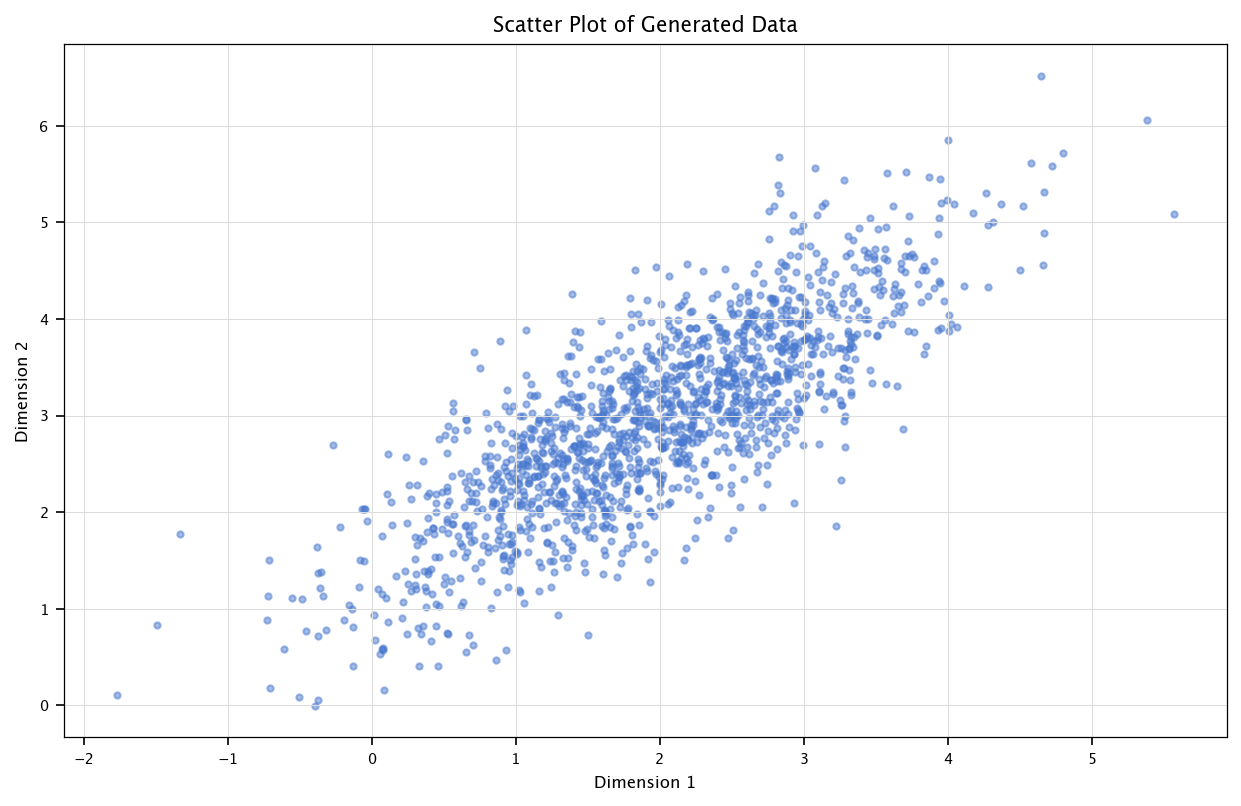

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [22]:
from scipy.stats import multivariate_normal as mvn

mean = np.array([2, 3])
cov = np.array([[1, 0.8], [0.8, 1]])
n_samples = 1500

data = mvn(mean=mean, cov=cov).rvs(size=n_samples)

sample_mean = np.mean(data, axis=0)
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
plt.title("Scatter Plot of Generated Data")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid("on")
plt.show()

sample_cov = np.cov(data, rowvar=False)

pprint("\\mu=", mean)
pprint("\\hat{\\mu}=", sample_mean)
pprint("Cov:", np.array(cov))
pprint("MC\ Cov:", sample_cov)

### Exercise:
We define a bivariate gaussian distribution $(\mathbf Z_1, \mathbf Z_2)$ with the following parameters:
- Mean vector: $[0.25, 1.0]$
- Covariance matrix: $\begin{bmatrix}1.0&0.5\\0.5&1.0\end{bmatrix}$

Plot the regressions of $\mathbf Z_1|\mathbf Z_2$ and $\mathbf Z_2|\mathbf Z_1$. What is their intersection ? Hint: those are given by expressing $\mathbf Z_1$ in terms of $\mathbf Z_2$ (or the opposite): $\mathbf Z_1 = a_1 + b_1\mathbf Z_2$. 

#### Solution
For the following derivation, we redirect the student to the theoretical handbook, pages 64-65. The following code generates a set of samples from a bivariate normal distribution with mean vector $\mu = \begin{bmatrix} 0.25 \\ 1 \end{bmatrix}$ and covariance matrix $\Sigma = \begin{bmatrix} 1 & 0.5 \\ 0.5 & 1 \end{bmatrix}$, then computes and visualizes the regression lines corresponding to the conditional expectations $\mathbb{E}[\mathbf Z_1 \mid \mathbf Z_2]$ and $\mathbb{E}[\mathbf Z_2 \mid \mathbf Z_1]$. The regression coefficients are computed as $b_1 = \frac{\Sigma_{12}}{\Sigma_{22}}$ and $b_2 = \frac{\Sigma_{12}}{\Sigma_{11}}$, with intercepts $a_1 = \mu_1 - b_1 \mu_2$ and $a_2 = \mu_2 - b_2 \mu_1$. The resulting lines are plotted on the $(\mathbf Z_2, \mathbf Z_1)$ plane, showing the best linear predictors of each variable given the other.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

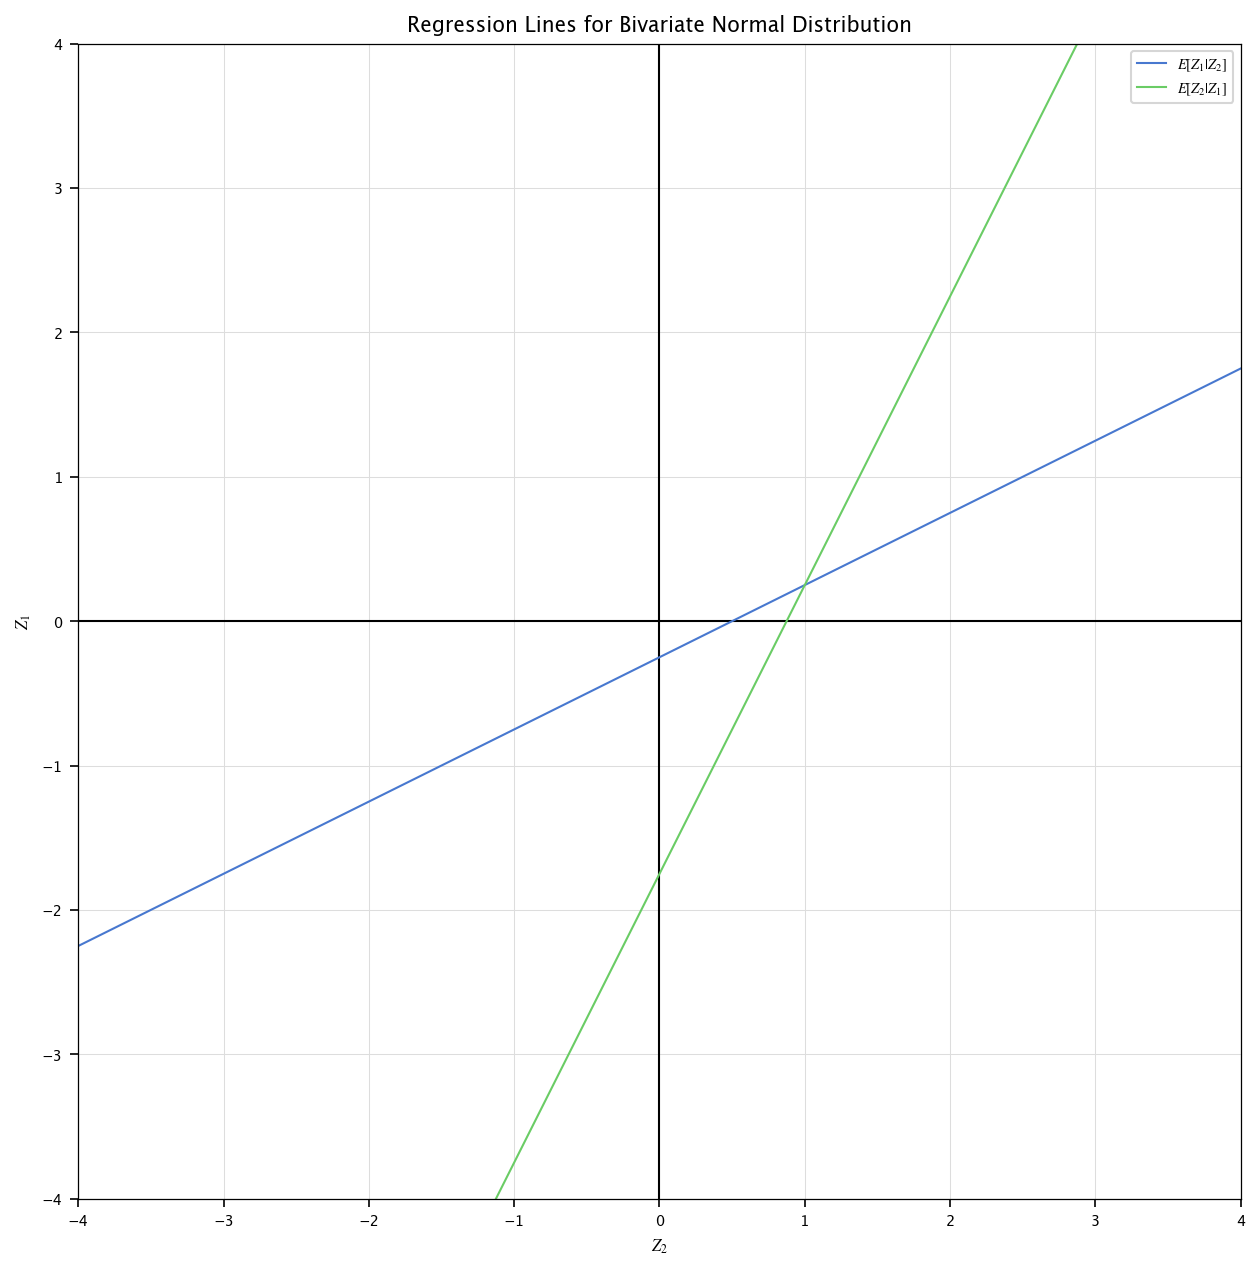

In [23]:
mean = np.array([0.25, 1.])
cov = np.array([[1., 0.5], [0.5, 1.]])

data = mvn(mean=mean, cov=cov).rvs(n_points)

b_1 = cov[0, 1] / cov[1, 1]
b_2 = cov[0, 1] / cov[0, 0]

a1 = mean[0] - b_1 * mean[1]
a2 = mean[1] - b_2 * mean[0]

pprint("\\text{Regression of }Z_1\\text{ on }Z_2: a_1 =", str(a1), ",\ b_1 =", str(b_1))
pprint("\\text{Regression of }Z_2\\text{ on }Z_1: a_2 =", str(a2), ",\ b_2 =", str(b_2))

z2 = np.linspace(-4, 4, 100)

z1_pred = a1 + b_1 * z2
z2_pred = (z2 - a2) / b_2

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)

plt.plot(z2, z1_pred, label="$E[Z_1 | Z_2]$")
plt.plot(z2, z2_pred, label="$E[Z_2 | Z_1]$")
plt.xlabel("$Z_2$")
plt.ylabel("$Z_1$")
plt.legend()
plt.grid("on")
plt.title("Regression Lines for Bivariate Normal Distribution")
plt.show()

### Exercise: Trivariate Gaussian data
Finally, generate 1000 samples of 3-dimensional Gaussian random data with the following parameters:

- Mean vector: $[1, 4, 7]$
- Covariance matrix:$\begin{bmatrix}3&1.5&0.8\\1.5&2&0.5\\0.8&0.5&1\end{bmatrix}$

Estimate the covariance matrix using the generated data. Visualize the pairwise scatter plots of the dimensions (use a scatter plot matrix).
Hints: use `pandas.plotting.scatter_matrix` or `seaborn.pairplot` for visualization.
Pay attention to the interpretation of correlations between dimensions.

#### Solution
The following code generates a 3-dimensional dataset of 1000 samples from a multivariate normal distribution with a specified mean vector $[1, 4, 7]$ and covariance matrix $\begin{bmatrix} 3 & 1.5 & 0.8 \\ 1.5 & 2 & 0.5 \\ 0.8 & 0.5 & 1 \end{bmatrix}$. It stores the generated samples in a Pandas DataFrame with columns labeled "Dimension 1", "Dimension 2", and "Dimension 3". It then computes the empirical covariance matrix of the generated data using `np.cov`, prints both the given and estimated covariance matrices, and visualizes the pairwise relationships between the three dimensions using `Seaborn`'s `pairplot`.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

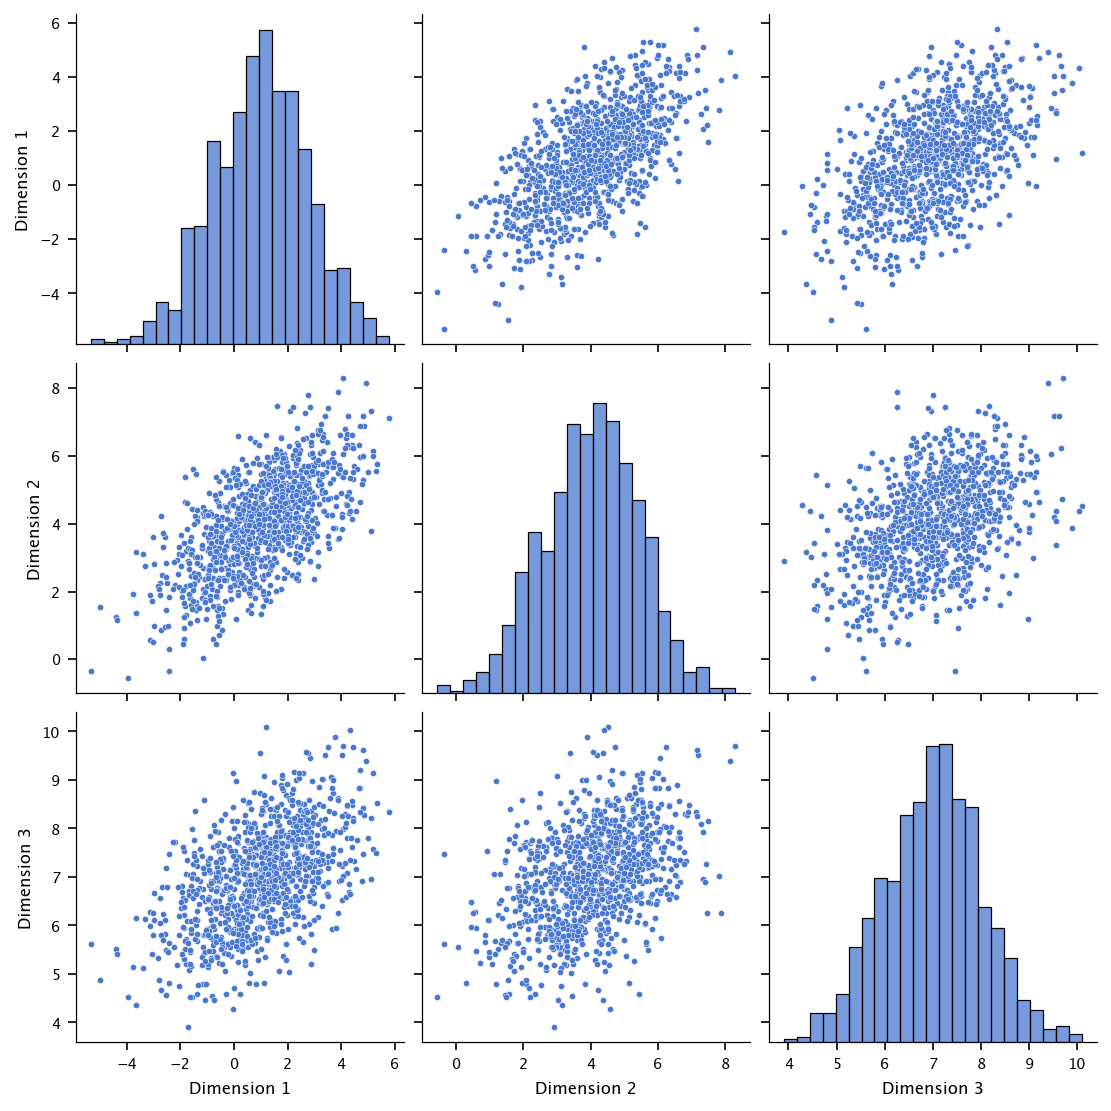

In [24]:
import pandas as pd
import seaborn as sns

mean_3d = [1, 4, 7]
cov_3d = [[3, 1.5, 0.8], 
          [1.5, 2, 0.5], 
          [0.8, 0.5, 1]]

n_samples_3d = 1000

data_3d = mvn(mean=mean_3d, cov=cov_3d).rvs(size=n_samples_3d)

df = pd.DataFrame(data_3d, columns=["Dimension 1", "Dimension 2", "Dimension 3"])

sample_cov_3d = np.cov(data_3d, rowvar=False)

pprint("Cov:", np.array(cov_3d))
pprint("MC\ Cov:", sample_cov_3d)

sns.pairplot(df)
plt.show()

### Exercise: Partial correlation
Given two normal $\mathcal{N}(0, 1)$ r.v. $Z_1, Z_2$ and a third r.v. $Y = Z_1 + Z_2$, compute the correlation between $Z_1$ and $Z_2$, then compute the partial correlation between $Z_1$ and $Z_2$ given $Y$. Hint: use the function `corrcoef` of `Numpy` to compute the correlation coefficients. What happens to the partial correlation between $Z_1$ and $Z_2$ given $Y$ if now  $Y = Z_1 + Z_2 + Z_3$, for $Z_3$ another $\mathcal{N}(0, 1)$ r.v. ?

#### Solution
This code defines a function `partial_corr(X, Y, Z)` that computes the partial correlation between two variables $\mathbf X$ and $\mathbf Y$ given a third variable $\mathbf Z$, using the formula $\rho_{\mathbf X\mathbf Y \cdot \mathbf Z} = \frac{\rho_{\mathbf X\mathbf Y} - \rho_{\mathbf X\mathbf Z}\rho_{\mathbf Y\mathbf Z}}{\sqrt{(1 - \rho_{\mathbf X\mathbf Z}^2)(1 - \rho_{\mathbf Y\mathbf Z}^2)}}$. It then generates one million samples of three independent standard normal variables $\mathbf Z_1, \mathbf Z_2, \mathbf Z_3$, defines $\mathbf Y = \mathbf Z_1 + \mathbf Z_2$, and prints the empirical correlation between $\mathbf Z_1$ and $\mathbf Z_2$, as well as the partial correlations between $\mathbf Z_1$ and $\mathbf Z_2$ given $\mathbf Y$ and given $\mathbf Y + \mathbf Z_3$, illustrating that the dependence between $\mathbf Z_1$ and $\mathbf Z_2$ vanishes when conditioning on their sum.

In [25]:
def partial_corr(X,Y,Z):
    rhoXY = np.corrcoef(X.T,Y.T)[0,1]
    rhoXZ = np.corrcoef(X.T,Z.T)[0,1]
    rhoYZ = np.corrcoef(Y.T,Z.T)[0,1]    
    return (rhoXY-rhoXZ*rhoYZ)/(np.sqrt((1-rhoXZ**2)*(1-rhoYZ**2)))

N = int(1e6)

Z1 = np.random.normal(size=(N, 1))
Z2 = np.random.normal(size=(N, 1))
Z3 = np.random.normal(size=(N, 1))

Y = Z1 + Z2

pprint("\\text{Correlation between }\\mathbf Z_1\\text{ and }\\mathbf Z_2: ", str(np.corrcoef(Z1.T,Z2.T)[0, 1])[:8])
pprint("\\text{Partial Correlation between }\\mathbf Z_1\\text{ and }\\mathbf Z_2\\text{ given }\\mathbf Y=\\mathbf Z_1+\\mathbf Z_2:", str(partial_corr(Z1, Z2, Y))[:8])
pprint("\\text{Partial Correlation between }\\mathbf Z_1\\text{ and }\\mathbf Z_2\\text{ given }\\mathbf Y=\\mathbf Z_1+\\mathbf Z_2+\\mathbf Z_3:", str(partial_corr(Z1, Z2, Z1 + Z2 + Z3))[:8])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Minimization
`Scipy` offers a convenient tool to perform the minimization of a derivable univariate function: in the module `optimize`, we have the `minimize` function. 
### Exercise: Minimization
Define a function

$$f(x) = x^2 + (\sin{x} + 25)^2$$

and use the `sp.optimize.minimize` function to find different local minima. Plot the function an show the different minimas. On which parameter of the `minimize` function can you play?

#### Solution
The following code defines a function $f(x) = x^2 + (\sin(x) + 25)^2$, then plots it over the interval $[-15, 15]$. For several initial guesses $x_0 \in \{-12, -4, 1, 7, 14\}$, the script uses the `SciPy` optimization routine `minimize` to find a local minimum of $f(x)$ starting from $x_0$. Each minimization path is illustrated as a dashed line connecting the initial point to the corresponding minimum, with different colors representing different initial guesses. The plot includes a legend, grid, and title to clearly display the function and minimization results.

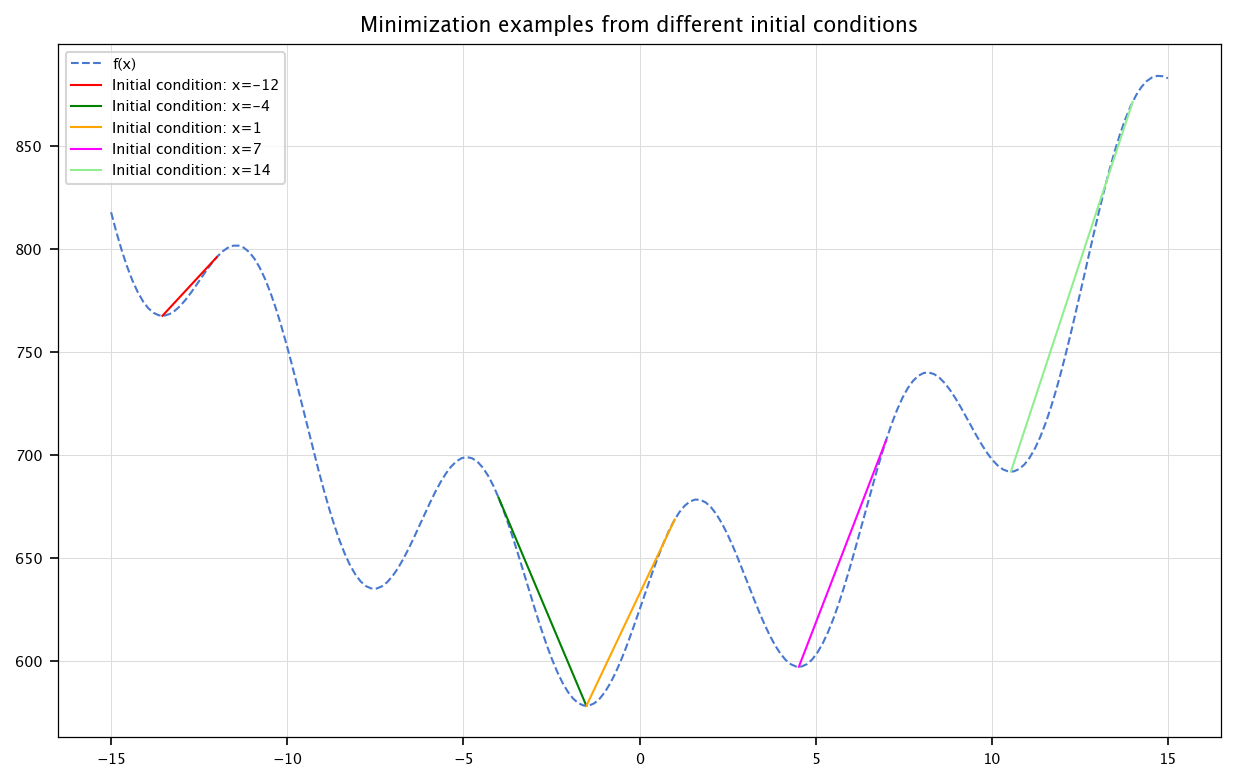

In [26]:
def f(x):
    return (x**2 + (np.sin(x)+25)**2)

x_vec = np.linspace(-15, 15, 200)
plt.figure(figsize=(10, 6))
plt.plot(x_vec, f(x_vec), linestyle='dashed', label="f(x)")
for c in (c_i:={"red": -12, "green": -4, "orange": 1, "magenta": 7, "lightgreen": 14}):   
    minimum = sp.optimize.minimize(f, x0=c_i[c])
    line_x, line_y = [c_i[c], minimum.x[0]], [f(c_i[c]), minimum.fun]
    plt.plot(line_x, line_y, color=c, label=f"Initial condition: x={c_i[c]}")
plt.legend()
plt.grid("on")
plt.title("Minimization examples from different initial conditions")
plt.show()

## Mixture of Gaussians
Mixture of Gaussians are particular cases of linear combinations of Gaussians r.v. Formally, they are defined as

$$p = \sum_{i=1}^m w_i p_i$$ 

where $p_i$ are normal r.v. and $\sum_i w_1=1$.
As an example, we show here how to define (and plot) the mixture of three Gaussians:

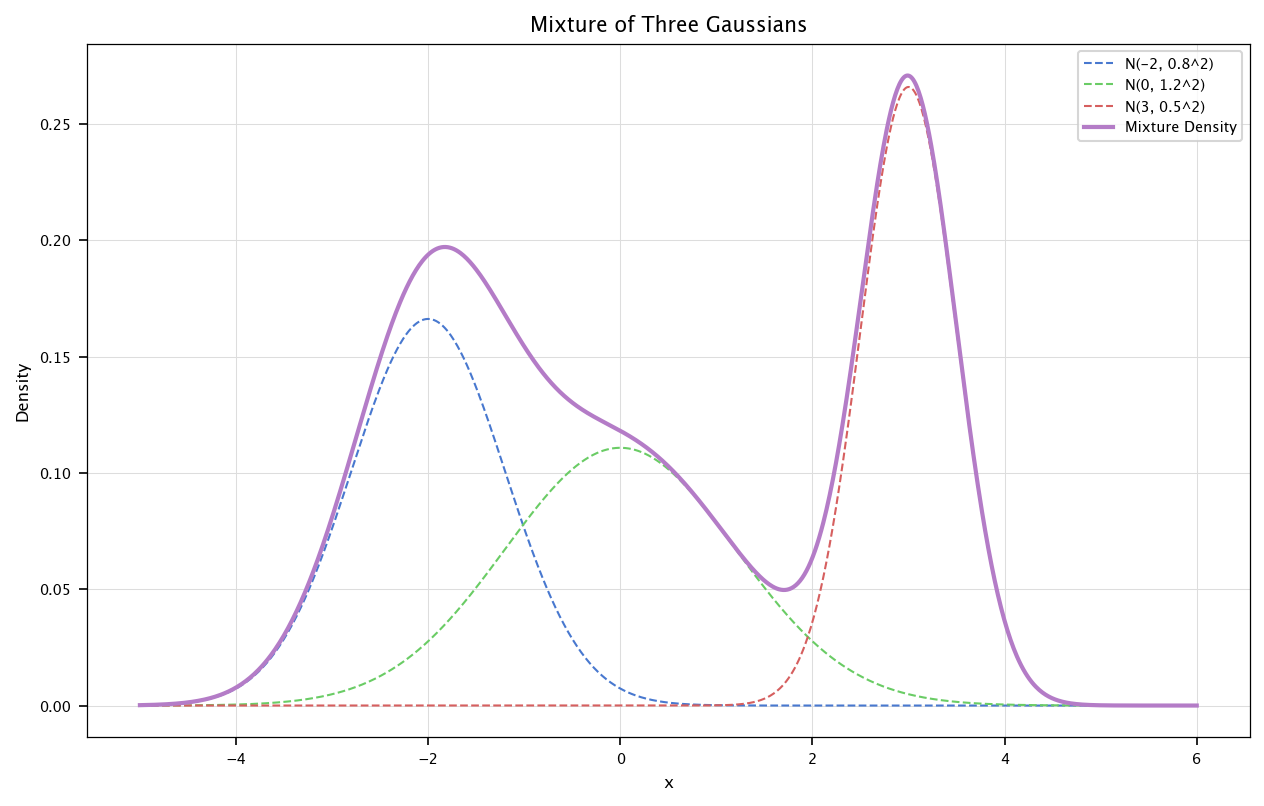

In [27]:
means = [-2, 0, 3]  
stds = [0.8, 1.2, 0.5]  
weights = [1/3, 1/3, 1/3]  

x = np.linspace(-5, 6, 1000)

y = np.zeros_like(x)
for mean, std, weight in zip(means, stds, weights):
    y += weight * sp.stats.norm.pdf(x, mean, std)

plt.figure(figsize=(10, 6))
for mean, std, weight in zip(means, stds, weights):
    plt.plot(x, weight * sp.stats.norm.pdf(x, mean, std), '--', label=f'N({mean}, {std}^2)')

plt.plot(x, y, label='Mixture Density', linewidth=2)
plt.legend()
plt.xlabel('x')
plt.ylabel('Density')
plt.grid("on")
plt.title('Mixture of Three Gaussians')
plt.show()

## Conclusion
Monte Carlo methods represent a powerful paradigm in computational mathematics, offering solutions to problems that would otherwise be analytically intractable. Throughout this chapter, we've explored the fundamental principles of probabilistic methods and Monte Carlo simulations, covering essential concepts from probability theory and their practical applications.

We've seen how random sampling can be leveraged to approximate integrals, estimate statistical properties, and solve complex problems in high-dimensional spaces. The exercises provided hands-on experience with implementing these techniques using `Python`'s scientific computing ecosystem, particularly `NumPy` and `SciPy`.

The versatility of Monte Carlo methods makes them invaluable across numerous fields, from physics and engineering to finance and machine learning. By understanding both the theoretical foundations and practical implementations, you now possess a valuable computational tool that can be applied to a wide range of problems.

As computational resources continue to advance, Monte Carlo techniques will remain at the forefront of scientific computing, enabling researchers and practitioners to tackle increasingly complex challenges. The principles covered in this chapter provide a solid foundation for exploring more advanced Monte Carlo techniques such as Markov Chain Monte Carlo (MCMC), importance sampling, particle filters... But, in our case, Monte Carlo processes can be seen as good abstraction of real-life processes, and Machine Learning techniques then serve as tools to study the outcomes of Monte Carlo experiments.

Remember that Monte Carlo methods are not just computational techniques but represent a probabilistic way of thinking about problems. This mindset of using randomness to solve deterministic problems opens up new approaches to complex challenges across all quantitative disciplines.  